<a href="https://colab.research.google.com/github/noreallyimfine/DS-Unit-2-Regression-Classification/blob/master/module4/Copy_of_assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [ ] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [x] Do train/validate/test split with the Tanzania Waterpumps data.
- [x] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [x] Use scikit-learn for logistic regression.
- [x] Get your validation accuracy score.
- [x] Get and plot your coefficients.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.0)
Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [43]:
# Create y_vector by just taking the label from the labels df
y_train = train_labels['status_group']

# Distribution of target values
y_train.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [44]:
# Split train data into train and validation

from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.80, test_size=0.20,
    stratify=y_train, random_state=42
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [7]:
# Confirm stratified
y_val.value_counts(normalize=True)

functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64

In [9]:
# Close enough?
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [0]:
# Select just numeric for simple model
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

In [11]:
# No null values
X_train_numeric.isna().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [15]:
# Baseline Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, n_jobs=-1)

model.fit(X_train_numeric, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Make Predictions
y_pred = model.predict(X_val_numeric)

In [17]:
# Not much better than base-baseline
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.5546296296296296

In [19]:
# Which non-numeric values have low cardinality
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [20]:
# Quantity 
# Explorative check how it relates to status_group
train = X_train.copy()
train['status_group'] = y_train

train.groupby('quantity')['status_group'].value_counts(normalize=True)

quantity      status_group           
dry           non functional             0.967689
              functional                 0.026011
              functional needs repair    0.006300
enough        functional                 0.650920
              non functional             0.276998
              functional needs repair    0.072082
insufficient  functional                 0.521106
              non functional             0.382786
              functional needs repair    0.096108
seasonal      functional                 0.580456
              non functional             0.318434
              functional needs repair    0.101110
unknown       non functional             0.713386
              functional                 0.267717
              functional needs repair    0.018898
Name: status_group, dtype: float64

In [0]:
# Plot to get practice
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

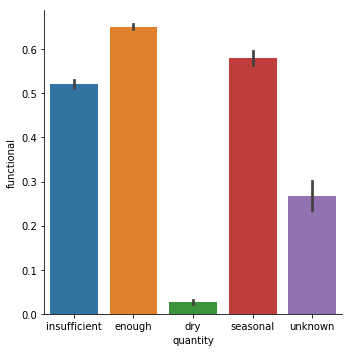

In [23]:
train['functional'] = (train['status_group'] == 'functional').astype(int)

sns.catplot(x='quantity', y='functional', data=train, kind='bar');

In [0]:
# Encode quantity 
import category_encoders as ce

categorical_features = ['quantity']
numeric_features = X_train_numeric.columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [0]:
# Scale 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

In [28]:
# New Model, numeric + quantity 
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000, n_jobs=-1)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.6579124579124579


In [31]:
X_train_scaled[:1]

array([[ 1.7059149 , -1.12602531, -0.33988107, -0.27068004, -0.11637774,
        -0.10068953, -0.96618925, -0.08234652, -1.17935266, -0.03588534,
        -0.18586897, -0.1680417 , -0.38828453, -1.36997234]])

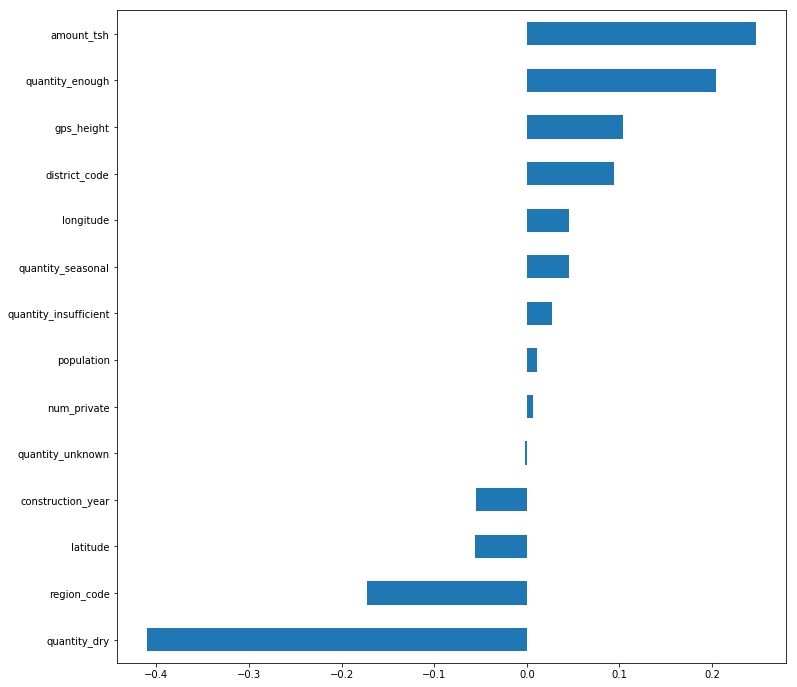

In [32]:
functional_coefficients = pd.Series(
    model.coef_[0],
    X_train_encoded.columns
)

plt.figure(figsize=(12, 12))
functional_coefficients.sort_values().plot.barh();

In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
assert all(X_test_encoded.columns == X_train_encoded.columns)

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Jay_1st_Submission.csv', index=False)

In [0]:
from google.colab import files
files.download('Jay_1st_Submission.csv')

In [37]:
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe


In [38]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44876,2,True,40838
permit,45077,2,True,31071
source_class,47520,3,groundwater,36638
management_group,47520,5,user-group,42027
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
waterpoint_type_group,47520,6,communal standpipe,27642
quality_group,47520,6,good,40598
payment_type,47520,7,never pay,20287


In [50]:
# What are the different values for management group and what is their distribution
X_train['management_group'].value_counts(normalize=True)

user-group    0.884407
commercial    0.060901
parastatal    0.029398
other         0.015762
unknown       0.009533
Name: management_group, dtype: float64

In [0]:
train['functional'] = y_train

In [53]:
# Management group might tell us something, but the proportions are fairly similar across values
train.groupby('management_group')['functional'].value_counts(normalize=True)

management_group  functional             
commercial        functional                 0.612301
                  non functional             0.352799
                  functional needs repair    0.034900
other             functional                 0.564753
                  non functional             0.371162
                  functional needs repair    0.064085
parastatal        functional                 0.585540
                  non functional             0.302076
                  functional needs repair    0.112384
unknown           non functional             0.567329
                  functional                 0.388521
                  functional needs repair    0.044150
user-group        functional                 0.538178
                  non functional             0.387394
                  functional needs repair    0.074428
Name: functional, dtype: float64

In [54]:
# Source type has slightly more variation in distribution
train.groupby('source_type')['functional'].value_counts(normalize=True)

source_type           functional             
borehole              functional                 0.496688
                      non functional             0.461466
                      functional needs repair    0.041846
dam                   non functional             0.577220
                      functional                 0.388031
                      functional needs repair    0.034749
other                 functional                 0.547009
                      non functional             0.431624
                      functional needs repair    0.021368
rainwater harvesting  functional                 0.605164
                      non functional             0.255514
                      functional needs repair    0.139322
river/lake            functional                 0.545883
                      non functional             0.336235
                      functional needs repair    0.117882
shallow well          functional                 0.491893
                      non 

In [59]:
X_train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [0]:
categorical_features = ['quantity', 'source_type']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features
# Encode source_type
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [66]:
X_train_encoded.shape

(47520, 21)

In [69]:
X_train_encoded.columns

Index(['quantity_insufficient', 'quantity_enough', 'quantity_dry',
       'quantity_seasonal', 'quantity_unknown', 'source_type_spring',
       'source_type_shallow well', 'source_type_borehole',
       'source_type_river/lake', 'source_type_rainwater harvesting',
       'source_type_dam', 'source_type_other', 'amount_tsh', 'gps_height',
       'longitude', 'latitude', 'num_private', 'region_code', 'district_code',
       'population', 'construction_year'],
      dtype='object')

In [0]:
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

In [73]:
# model did worse with source type
model.fit(X_train_scaled, y_train)

print('Validation Score: ', model.score(X_val_scaled, y_val))

Validation Score:  0.5304713804713804


In [76]:
# Water quality seems where its at
train.groupby('water_quality')['functional'].value_counts(normalize=True)

water_quality       functional             
coloured            functional                 0.496278
                    non functional             0.394541
                    functional needs repair    0.109181
fluoride            functional                 0.769697
                    non functional             0.175758
                    functional needs repair    0.054545
fluoride abandoned  non functional             0.642857
                    functional                 0.357143
milky               functional                 0.550152
                    non functional             0.433131
                    functional needs repair    0.016717
salty               non functional             0.500128
                    functional                 0.452472
                    functional needs repair    0.047399
salty abandoned     functional                 0.514493
                    non functional             0.278986
                    functional needs repair    0.206522
soft

In [0]:
X_train_encoded['water_quality'] = train['water_quality']
X_val_encoded['water_quality'] = X_val['water_quality']

In [78]:
X_train_encoded.drop('')

Index(['quantity_insufficient', 'quantity_enough', 'quantity_dry',
       'quantity_seasonal', 'quantity_unknown', 'source_type_spring',
       'source_type_shallow well', 'source_type_borehole',
       'source_type_river/lake', 'source_type_rainwater harvesting',
       'source_type_dam', 'source_type_other', 'amount_tsh', 'gps_height',
       'longitude', 'latitude', 'num_private', 'region_code', 'district_code',
       'population', 'construction_year', 'water_quality'],
      dtype='object')

In [0]:
categorical_features = ['quantity', 'water_quality']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features
# Encode source_type
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [85]:
X_train_encoded

,quantity_insufficient,quantity_enough,quantity_dry,quantity_seasonal,quantity_unknown,water_quality_soft,water_quality_salty,water_quality_fluoride,water_quality_milky,water_quality_unknown,water_quality_salty abandoned,water_quality_coloured,water_quality_fluoride abandoned,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
43360,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0,33.542898,-9.174777,0,12,4,0,0
7263,0,1,0,0,0,1,0,0,0,0,0,0,0,500.0,2049,34.665760,-9.308548,0,11,4,175,2008
2486,1,0,0,0,0,0,1,0,0,0,0,0,0,25.0,290,38.238568,-6.179919,0,6,1,2300,2010
313,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,0,30.716727,-1.289055,0,18,1,0,0
52726,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,0,35.389331,-6.399942,0,1,6,0,0
8558,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,1295,31.214583,-8.431428,0,15,2,200,1986
2559,1,0,0,0,0,1,0,0,0,0,0,0,0,20000.0,1515,36.696700,-3.337926,0,2,2,150,1995
54735,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,0,36.292724,-5.177333,0,1,1,0,0
25763,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,0,32.877248,-8.925921,0,12,6,0,0
44540,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,0,33.014412,-3.115869,0,19,7,0,0


In [86]:
# Model with quantity and water_quality
# Doesnt really perform better than just quantity

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model.fit(X_train_scaled, y_train)

print('Validation Score:', model.score(X_val_scaled, y_val))

Validation Score: 0.6585016835016835


In [87]:
X_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe


In [88]:
# Water quality seems where its at
train.groupby('region')['functional'].value_counts(normalize=True)

region         functional             
Arusha         functional                 0.682055
               non functional             0.267312
               functional needs repair    0.050633
Dar es Salaam  functional                 0.572108
               non functional             0.423138
               functional needs repair    0.004754
Dodoma         non functional             0.454751
               functional                 0.448529
               functional needs repair    0.096719
Iringa         functional                 0.786588
               non functional             0.189412
               functional needs repair    0.024000
Kagera         functional                 0.525813
               non functional             0.380880
               functional needs repair    0.093308
Kigoma         functional                 0.475835
               non functional             0.309315
               functional needs repair    0.214851
Kilimanjaro    functional                 0

In [0]:
categorical_features = ['quantity',  'region']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features
# Encode source_type
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [94]:
X_train_encoded.shape

(47520, 43)

In [95]:
 # Model with quantity and region
# Doesnt really perform better than just quantity

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model.fit(X_train_scaled, y_train)

print('Validation Score:', model.score(X_val_scaled, y_val))

Validation Score: 0.6620370370370371


In [96]:
train['population'].describe()

count    47520.000000
mean       179.805513
std        463.081564
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      15300.000000
Name: population, dtype: float64

In [97]:
train.population.value_counts()

0       17066
1        5627
200      1553
150      1509
250      1357
300      1181
50        942
100       901
500       823
350       809
120       772
400       623
60        575
30        491
40        449
80        428
450       396
20        361
600       347
230       304
75        245
1000      224
90        214
800       213
25        208
320       203
130       202
360       187
35        186
140       171
        ...  
722         1
402         1
4523        1
4208        1
489         1
1745        1
1032        1
936         1
3014        1
723         1
788         1
3750        1
1831        1
724         1
8848        1
628         1
104         1
564         1
468         1
1619        1
424         1
1555        1
1523        1
1363        1
2569        1
552         1
1203        1
3250        1
819         1
1439        1
Name: population, Length: 986, dtype: int64

In [98]:
train['construction_year'].describe()

count    47520.000000
mean      1302.768939
std        950.955437
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [100]:
train['construction_year']

43360       0
7263     2008
2486     2010
313         0
52726       0
8558     1986
2559     1995
54735       0
25763       0
44540       0
28603    1985
4372     2009
30666    2001
6431     2008
57420       0
1373     1972
2026     2003
58977    2006
41101    1985
10019    1994
5103     1996
36712    1995
29670    1980
54588       0
31867    1979
12090    2010
48300    2009
16754    2005
50582    2006
9136     2005
         ... 
26450    1999
56373       0
4595     1994
35771       0
41564    1984
30571       0
25961    2003
21280    2000
40122    2006
42270    1978
38160    1984
6050        0
12578       0
56315    2007
48801    2008
5891     1990
59254    1992
3731     2011
23046    1980
28292    2008
19682       0
38481       0
7096     2003
36363    2003
48006       0
9795     2009
58170       0
17191    2012
8192     1988
49783    1982
Name: construction_year, Length: 47520, dtype: int64

In [0]:
import numpy as np

In [106]:
X_train['construction_year']= X_train['construction_year'].fillna(X_train['construction_year'].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
categorical_features = ['quantity',  'region']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features
# Encode source_type
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [109]:
 # Model with quantity and region after filling 0 year with median
# Doesnt really perform better than just quantity

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model.fit(X_train_scaled, y_train)

print('Validation Score:', model.score(X_val_scaled, y_val))

Validation Score: 0.6609427609427609


In [111]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
permit,45077,2,True,31071
public_meeting,44876,2,True,40838
status_group,47520,3,functional,25807
functional,47520,3,functional,25807
source_class,47520,3,groundwater,36638
quantity_group,47520,5,enough,26567
quantity,47520,5,enough,26567
management_group,47520,5,user-group,42027
quality_group,47520,6,good,40598


In [113]:
train.groupby('quality_group')['functional'].value_counts(normalize=True)

quality_group  functional             
colored        functional                 0.496278
               non functional             0.394541
               functional needs repair    0.109181
fluoride       functional                 0.737430
               non functional             0.212291
               functional needs repair    0.050279
good           functional                 0.566407
               non functional             0.356742
               functional needs repair    0.076851
milky          functional                 0.550152
               non functional             0.433131
               functional needs repair    0.016717
salty          non functional             0.485523
               functional                 0.456569
               functional needs repair    0.057909
unknown        non functional             0.841650
               functional                 0.139721
               functional needs repair    0.018629
Name: functional, dtype: float64

In [117]:
# This looks promising
train.groupby('waterpoint_type_group')['functional'].value_counts(normalize=True)

waterpoint_type_group  functional             
cattle trough          functional                 0.741573
                       non functional             0.247191
                       functional needs repair    0.011236
communal standpipe     functional                 0.577635
                       non functional             0.337855
                       functional needs repair    0.084509
dam                    functional                 1.000000
hand pump              functional                 0.617125
                       non functional             0.324367
                       functional needs repair    0.058509
improved spring        functional                 0.727417
                       non functional             0.171157
                       functional needs repair    0.101426
other                  non functional             0.826002
                       functional                 0.128649
                       functional needs repair    0.045348
Name: fun

In [0]:
categorical_features = ['quantity',  'region', 'waterpoint_type_group']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features
# Encode source_type
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [119]:
# Model with ['quantity',  'region', 'waterpoint_type_group'] after filling 0 year with median
# Doesnt really perform better than just quantity

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model.fit(X_train_scaled, y_train)

print('Validation Score:', model.score(X_val_scaled, y_val))

Validation Score: 0.6971380471380472


In [0]:
categorical_features = ['quantity', 'waterpoint_type_group']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features
# Encode source_type
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [121]:
# Model with ['quantity',  'region', 'waterpoint_type_group'] after filling 0 year with median
# Doesnt really perform better than just quantity

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model.fit(X_train_scaled, y_train)

print('Validation Score:', model.score(X_val_scaled, y_val))

Validation Score: 0.696043771043771


In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
assert all(X_test_encoded.columns == X_train_encoded.columns)

In [0]:
y_pred = model.predict(X_test_scaled)

In [128]:
y_pred.shape

(14358,)

In [0]:
sub

In [129]:
submission['status_group'] = y_pred
submission.head()

,id,status_group
0,50785,non functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional


In [0]:
submission.to_csv('jay_submission_2.csv', index=False)
files.download('jay_submission_2.csv')

In [132]:
train.groupby('payment')['functional'].value_counts(normalize=True)

payment                functional             
never pay              non functional             0.476709
                       functional                 0.448317
                       functional needs repair    0.074974
other                  functional                 0.576879
                       non functional             0.314451
                       functional needs repair    0.108671
pay annually           functional                 0.753914
                       non functional             0.179374
                       functional needs repair    0.066712
pay monthly            functional                 0.663305
                       non functional             0.225166
                       functional needs repair    0.111529
pay per bucket         functional                 0.676861
                       non functional             0.276358
                       functional needs repair    0.046781
pay when scheme fails  functional                 0.620757
         

In [0]:
categorical_features = ['quantity', 'waterpoint_type_group', 'payment']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features
# Encode source_type
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [134]:
# Model with ['quantity', 'waterpoint_type_group', 'payment'] after filling 0 year with median
# Doesnt really perform better than just quantity

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model.fit(X_train_scaled, y_train)

print('Validation Score:', model.score(X_val_scaled, y_val))

Validation Score: 0.6987373737373738


In [0]:
categorical_features = ['quantity', 'region', 'waterpoint_type_group', 'payment']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features
# Encode source_type
X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

In [136]:
# Model with ['quantity', 'waterpoint_type_group', 'payment'] after filling 0 year with median
# Doesnt really perform better than just quantity

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model.fit(X_train_scaled, y_train)

print('Validation Score:', model.score(X_val_scaled, y_val))

Validation Score: 0.7032828282828283


In [137]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,47520.000000,47520.000000,47520.000000,47520.000000,4.752000e+04,47520.000000,47520.000000,47520.000000,47520.000000,47520.000000
mean,37037.915699,321.925261,669.567656,34.082431,-5.705946e+00,0.477736,15.258291,5.616751,179.805513,1302.768939
std,21412.099719,3197.240487,693.005745,6.552053,2.941332e+00,13.312977,17.530228,9.621230,463.081564,950.955437
min,0.000000,0.000000,-63.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18482.750000,0.000000,0.000000,33.092142,-8.528215e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,36986.500000,0.000000,372.500000,34.910740,-5.021436e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55450.250000,25.000000,1320.000000,37.170578,-3.327185e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.344301,-2.000000e-08,1776.000000,99.000000,80.000000,15300.000000,2013.000000
